In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src="task 9.png">

$$
\large \begin{cases}
y'' = \cos(x) \\
y(-\frac{\pi}{2})=a \\
y(\frac{\pi}{2})=b
\end{cases} \Rightarrow y=-\cos(x)+x\frac{b-a}{\pi}+\frac{a+b}{2}
$$

Numerically:

$$
\large \begin{cases}
y'' \approx \frac{y_{i+1}-2y_i+y_{i-1}}{h^2} = f_i \\
y_0=A \\
y_N=B
\end{cases}
$$

So, we have system of equations:


$$
\large\left (\begin{matrix}
 1 & 0 & 0 & 0 & \dots & 0 & 0 & 0 \\
 1 & -2 & 1 & 0 & \dots & 0 & 0 & 0 \\
 0 & 1 & -2 & 1 & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & 1 & -2 & 1 \\
 0 & 0 & 0 & 0 & \dots & 0 & 0 & 1
\end{matrix}\right ) * \left(\begin{matrix} y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_{n-1} \\ y_n \end{matrix}\right)
=
\left(\begin{matrix}
A \\
h^2f_1 \\
h^2f_2 \\
\vdots \\
h^2f_{n-1} \\
B
\end{matrix}\right)
$$

So matrix A is:

$$
\large A=
\large \left(
\begin{matrix}
 b_1 & c_1 & 0 & 0 & \dots & 0 & 0 & a_1 \\
 a_2 & b_2 & c_2 & 0 & \dots & 0 & 0 & 0 \\
 0 & a_3 & b_3 & c_3 & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \ & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & a_{n-1} & b_{n-1} & c_{n-1} \\
 c_n & 0 & 0 & 0 & \dots & 0 & a_n & b_n
\end{matrix} \right)
=
\left( \begin{matrix}
 1 & 0 & 0 & 0 & \dots & 0 & 0 & 0 \\
 1 & -2 & 1 & 0 & \dots & 0 & 0 & 0 \\
 0 & 1 & -2 & 1 & \dots & 0 & 0 & 0 \\
 \vdots & \vdots & \vdots & \vdots & \  & \vdots & \vdots & \vdots\\
 0 & 0 & 0 & 0 & \dots & 1 & -2 & 1 \\
 0 & 0 & 0 & 0 & \dots & 0 & 0 & 1
\end{matrix} \right)
$$


In [2]:
left_border = 0 # Border conditions
right_border = 1

x_from = -np.pi/2
x_to = np.pi/2

N = 100
h = (x_to-x_from)/N

f = lambda x: np.cos(x)
solution = lambda x: -f(x) + x*(right_border-left_border)/np.pi \
                           + (left_border+right_border)/2

# g = lambda x: np.sin(x)                                                 # Just for test of error form
# g_solution = lambda x: -f(x) + x*(right_border+2-left_border)/np.pi \
#                            + (left_border-1+(right_border+2-left_border)/2)

In [11]:
def TridiagonalMatrix(): # Sweeping method
# Coefficients
    a = [0] + [ 1 for _ in range(N-1)] + [0]
    b = [1] + [-2 for _ in range(N-1)] + [1]
    c = [0] + [ 1 for _ in range(N-1)] + [0]

    x = np.linspace(x_from, x_to, N+1)
    d = f(x) * pow(h, 2)
    d[0] = left_border
    d[-1] = right_border


# Forward step. We need to delete a_2..a_n
    for i in range(1, N+1):   # See p15
        ksi = a[i] / b[i - 1]
        b[i] -= ksi * c[i - 1]
        d[i] -= ksi * d[i - 1]


# Reverse step
    y = np.zeros(N+1)
    y[N] = d[N] / b[N]

# Calculate from nth to the first
    for i in range(N-1, -1, -1):
        y[i] = (d[i] - c[i] * y[i + 1]) / b[i]

    return x, y

In [12]:
x, y = TridiagonalMatrix() # Numerically
sol = solution(x)          # Analytically

error = [(y[i] - sol[i]) for i in range(len(x))]

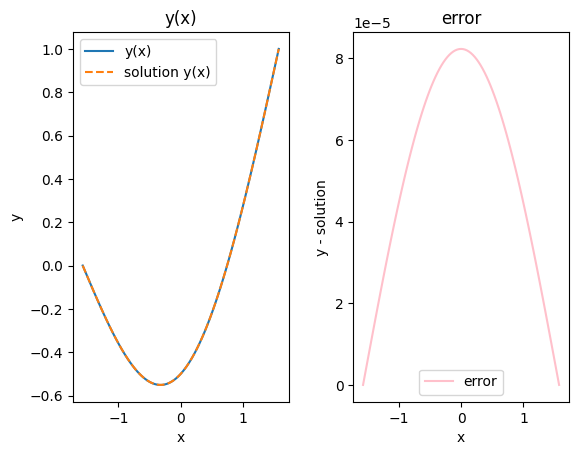

In [17]:
fig = plt.figure()

plt_gr = fig.add_subplot(121)
plt_err = fig.add_subplot(122)

plt_gr.set_title('y(x)')
plt_gr.set_xlabel('x')
plt_gr.set_ylabel('y')
plt_gr.plot(x, y, label='y(x)')
plt_gr.plot(x, sol, label='solution y(x)', linestyle='dashed')

plt_err.set_title('error')
plt_err.set_xlabel('x')
plt_err.set_ylabel('y - solution')
plt_err.plot(x, np.abs(error), color='pink', label='error')

fig.subplots_adjust(hspace=0.3, wspace=0.3)
plt_gr.legend()
plt_err.legend()
plt.show()

y'' is aproximated by divided difference => error is proportional to:

$$\Large 
y''(0)+\frac{h^{2}}{12} y^{(iv)}

$$

=> err looks like cosine func (fourth derivative)